In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\TranNgocPhat\AppData\Local\Temp\ipykernel_20172\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1. Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên

In [3]:
penguins_POP = pd.read_csv("../midterm-practice/penguins-data.csv")
penguins_POP.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
8,13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
9,14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


2. Tìm hiểu thông tin về dữ liệu: 


 a. Số lượng chim cánh cụt của mỗi loài.  


 b. Số lượng mỗi loài chim cánh cụt trên mỗi đảo 


 c. Với mỗi loại chim cánh cụt, bạn hãy so sánh các đại lượng thống kê: giá trị 
trung bình, trung vị, độ lệch chuẩn trên các thuộc tính độ dài mỏ 
(bill_leghth_mm), độ sâu mỏ (bill_depth_mm), độ dài cánh (flipper) và trọng 
lượng (body_mass).


 d. Dựa trên kết quả tính được, bạn có rút ra được nhận xét gì không?

In [4]:
# a
penguins_POP.groupby('species').size()

species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64

In [5]:
#b 
penguins_POP.groupby(['species', 'island']).size()

species    island   
Adelie     Biscoe        44
           Dream         55
           Torgersen     47
Chinstrap  Dream         68
Gentoo     Biscoe       119
dtype: int64

In [10]:
#c
adelie = penguins_POP[penguins_POP['species'] == 'Adelie'][['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].describe().loc[['mean','50%','std']]
chinstrap = penguins_POP[penguins_POP['species'] == 'Chinstrap'][['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].describe().loc[['mean','50%','std']]
gentoo = penguins_POP[penguins_POP['species'] == 'Gentoo'][['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].describe().loc[['mean','50%','std']]

pd.concat([adelie, chinstrap, gentoo], axis=1, keys=['Adelie', 'Chinstrap', 'Gentoo']).transpose()

mean      50%         std
Adelie    bill_length_mm       38.823973    38.85    2.662597
          bill_depth_mm        18.347260    18.40    1.219338
          flipper_length_mm   190.102740   190.00    6.521825
          body_mass_g        3706.164384  3700.00  458.620135
Chinstrap bill_length_mm       48.833824    49.55    3.339256
          bill_depth_mm        18.420588    18.45    1.135395
          flipper_length_mm   195.823529   196.00    7.131894
          body_mass_g        3733.088235  3700.00  384.335081
Gentoo    bill_length_mm       47.568067    47.40    3.106116
          bill_depth_mm        14.996639    15.00    0.985998
          flipper_length_mm   217.235294   216.00    6.585431
          body_mass_g        5092.436975  5050.00  501.476154

3. Vẽ đồ thị phù hợp thể hiện phân phối của ba loại chim cánh cụt, qua đó bạn 
hãy đưa ra bình luận của mình. 

c:\Users\TranNgocPhat\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\TranNgocPhat\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\TranNgocPhat\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

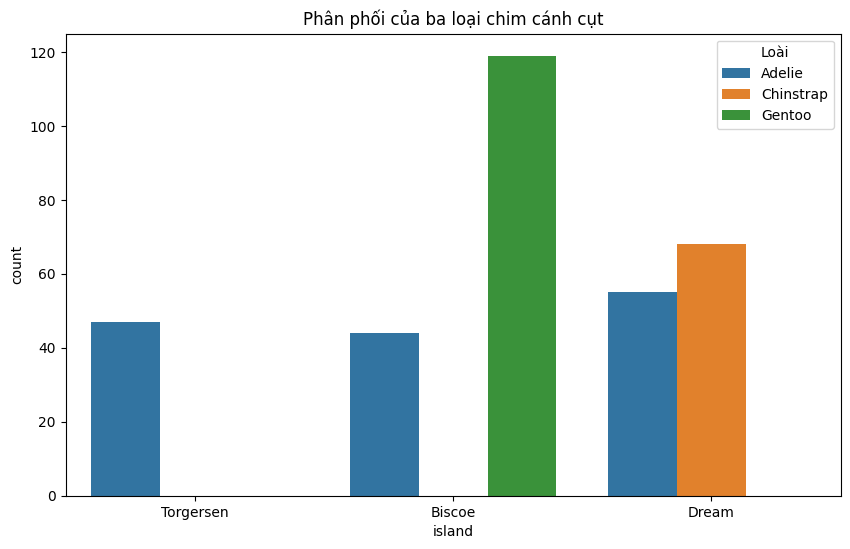

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='island', hue='species', data=penguins_POP)
plt.title('Phân phối của ba loại chim cánh cụt')
plt.legend(title='Loài')
plt.show()

4. Chọn loại đồ thị phù hợp để khảo sát mối quan hệ giữa độ dài cánh và trọng 
lượng của loài chim cánh cụt Gentoo: 


a. Theo bạn hai đại lượng này có quan hệ với nhau hay không? Giải thích. 


b. Ngoài độ dài cánh, theo bạn còn thuộc tính nào có khả năng ảnh hưởng đến 
trọng lượng của loài chim Gentoo?